# Nx versus T and OA

In [2]:
%load_ext autoreload

%autoreload 2

In [3]:
from IPython import get_ipython

# noinspection PyBroadException
try:
    _ipython = get_ipython()
    _magic = _ipython.magic
    _magic('load_ext autoreload')
    _magic('autoreload 2')
except:
    pass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from pathlib import Path

from bs_fdbck.util.BSOA_datamanip import ds2df_inc_preprocessing, ds2df_echam
from bs_fdbck.util.collocate.collocateLONLAToutput import CollocateLONLATout
from bs_fdbck.util.collocate.collocate_echam_salsa import CollocateModelEcham
import useful_scit.util.log as log

from bs_fdbck.util.plot.BSOA_plots import make_cool_grid, plot_scatter

log.ger.setLevel(log.log.INFO)
import time
import xarray as xr
import matplotlib.pyplot as plt

/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/bs_fdbck/data_info/area_defs.csv
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:

import numpy as np



In [6]:
plot_path = Path('Plots')

In [7]:
def make_fn_scat(case, v_x, v_y):
    _x = v_x.split('(')[0]
    _y = v_y.split('(')[0]
    f = f'scat_all_years_echam_noresm_{case}_{_x}_{_y}.png'
    return plot_path /f

In [8]:
plot_path.mkdir(exist_ok=True, parents=True)

# Load observational data: 

In [9]:
import pandas as pd

In [10]:
from bs_fdbck.constants import path_measurement_data

In [11]:
fn = path_measurement_data /'SourceData_Yli_Juuti2021.xls'

df_hyy_1 = pd.read_excel(fn, sheet_name=0, header=2, usecols=range(6))

df_hyy_1.head()

df_hyy_1['date'] = df_hyy_1.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_hyy_1['date'] = pd.to_datetime(df_hyy_1['date'] )



In [12]:
fn = path_measurement_data /'SourceData_Yli_Juuti2021.xls'

df_hyy_2 = pd.read_excel(fn, sheet_name=2, header=2, usecols=range(6))

df_hyy_2.head()

df_hyy_2['date'] = df_hyy_2.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_hyy_2['date'] = pd.to_datetime(df_hyy_2['date'] )

df_hyy_2

df_hyy_2['date'] = df_hyy_2.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_hyy_2['date'] = pd.to_datetime(df_hyy_2['date'] )

df_hyy_2 = df_hyy_2.set_index('date')

In [13]:
df_hyy_2

,year,month,day,T (degree C),AOD_340 nm,AOD_500 nm
date,,,,,,
2012-07-02,2012,7,2,16.753083,0.117652,0.065783
2012-07-03,2012,7,3,17.366916,0.148389,0.082933
2012-07-04,2012,7,4,18.099667,0.144905,0.078666
2012-07-06,2012,7,6,18.627832,0.173471,0.087554
2012-07-20,2012,7,20,13.770333,0.149718,0.090444
...,...,...,...,...,...,...
2018-08-08,2018,8,8,20.297500,0.084738,0.047252
2018-08-16,2018,8,16,17.330334,0.229233,0.149357
2018-08-19,2018,8,19,15.192917,0.088741,0.056444


In [14]:
df_hyy_1 = df_hyy_1.set_index('date')

In [15]:
df_hyy_1 = pd.merge(df_hyy_1,df_hyy_2[['AOD_340 nm','AOD_500 nm']], left_index=True, right_index=True,how="outer",)

In [16]:
df_hyy_1.index = df_hyy_1.index.rename('time')

In [17]:
df_hyy_1.head()

,year,month,day,T (degree C),OA (microgram m^-3),N100 (cm^-3),AOD_340 nm,AOD_500 nm
time,,,,,,,,
2012-07-01,2012,7,1,17.308417,3.014541,781.245471,NaN,NaN
2012-07-02,2012,7,2,16.753084,1.697459,635.103339,0.117652,0.065783
2012-07-03,2012,7,3,17.366917,2.350536,745.212064,0.148389,0.082933
2012-07-04,2012,7,4,18.099667,2.118566,734.009356,0.144905,0.078666
2012-07-05,2012,7,5,19.267666,3.413631,1019.238450,NaN,NaN


In [18]:
from bs_fdbck.util.EBAS_data import get_ebas_dataset_Nx_daily_JA_median_df



#ds_ebas_Nx = get_ebas_dataset_with_Nx()

df_ebas_Nx, ds_ebas_Nx = get_ebas_dataset_Nx_daily_JA_median_df()#x_list = [90,100,110,120])

Importing files: 
[PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20120101000000.20181205100800.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20130101000000.20220222151057.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20140101000000.20220222151057.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20150101000000.20220222151057.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20160101000000.2022022

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
(click 8.0.1 (/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages), Requirement.parse('click<8,>=4.0'), {'rasterio'})
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


(26, 61368)
936.4618444654134 985.0322571360182
406.30625 427.8015
orig, xarray integrate (trapezoidal), constant dlogD, trap2:
985.344136501085 941.5562806424126 427.8015 406.30625
1.0465058295068634 1.0 0.4543557393171613
(22, 61368)
576.933862186921 615.6064516145758
297.64775000000003 307.0885
orig, xarray integrate (trapezoidal), constant dlogD, trap2:
615.7725574292614 580.4231039443305 307.0885 297.64775000000003
1.0609029055609773 1.0 0.5290769749052813
(20, 61368)
435.61068213080813 468.852571193976
258.4085 268.733
orig, xarray integrate (trapezoidal), constant dlogD, trap2:
469.34478625365017 439.3737553553595 268.733 258.4085
1.0682130658305946 1.0 0.611627337146372
(16, 61368)
226.68116710122004 250.40836733695068
122.36275 145.573
orig, xarray integrate (trapezoidal), constant dlogD, trap2:
251.00342993332777 228.17061005858926 145.573 122.36275
1.1000690661644614 1.0 0.6380006608327866
(14, 61368)
116.02642130210195 133.08403363633488
49.91325 62.435500000000005
orig, xa

/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/bs_fdbck/util/EBAS_data/__init__.py:242: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_JA.mean()
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/bs_fdbck/util/EBAS_data/__init__.py:245: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_JA.median())


In [19]:
fn = path_measurement_data /'SourceData_Yli_Juuti2021.xls'

df_hyy_1y = pd.read_excel(fn, sheet_name=0, header=2, usecols=range(7,12),nrows=7)

df_hyy_1y.head()
df_hyy_1y= df_hyy_1y.rename({'year.1':'year',
                            'T (degree C).1':'T (degree C)',
                             'OA (microgram m^-3).1':'OA (microgram m^-3)',
                             'N100 (cm^-3).1':'N100 (cm^-3)'
                            }, axis=1)
#df_hyy_1y['year'] = pd.to_datetime(df_hyy_1y['year'].apply(x:str(x)))

df_hyy_1y

/tmp/ipykernel_118128/1180385910.py:3: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  df_hyy_1y = pd.read_excel(fn, sheet_name=0, header=2, usecols=range(7,12),nrows=7)


,year,T (degree C),OA (microgram m^-3),N100 (cm^-3)
0,2012,14.819834,2.286611,485.015920
1,2013,16.061833,2.266324,458.851509
2,2014,18.469334,4.102861,706.239261
3,2015,14.949500,2.167607,499.026618
4,2016,13.959500,1.693031,418.417730
5,2017,13.619333,1.845648,409.297699
6,2018,17.848833,3.366803,770.183131


In [20]:
df_hyy_1y['year'] = df_hyy_1y['year'].apply(lambda x:f'{x:.0f}')

df_hyy_1y['date'] = df_hyy_1y['year']
df_hyy_1y = df_hyy_1y.set_index('date')



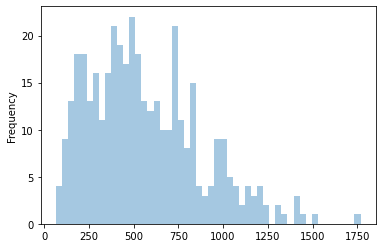

In [21]:
df_hyy_1['N100 (cm^-3)'].plot.hist(bins=50, alpha=0.4, label='obs')

plt.show()



## Why is my method 20% off their method? Is it integration?

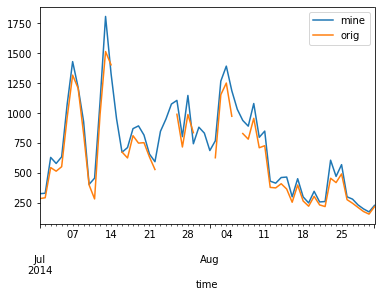

1.13207410632531


In [22]:

df_joint_hyy = pd.merge(df_ebas_Nx, df_hyy_1, left_index=True, right_index=True)
(df_joint_hyy['N100']).loc['2014-07':'2014-09'].plot(label='mine')
(df_joint_hyy['N100 (cm^-3)']).loc['2014-07':'2014-09'].plot(label='orig')
plt.legend()
plt.show()



print(df_joint_hyy['N100'][df_joint_hyy['N100 (cm^-3)'].notnull()].mean()/df_joint_hyy['N100 (cm^-3)'].mean())

# Read in model data:

### Some definitions:

In [23]:
models = ['NorESM','ECHAM-SALSA','UKESM']

In [24]:
dic_mod2case={

}

## Settings:

In [25]:
nr_of_bins = 5
maxDiameter = 39.6  #    23.6 #e-9
minDiameter = 5.0  # e-9
history_field='.h1.'

In [26]:
from_t = '2012-01-01'
to_t = '2015-01-01'

In [27]:
from_t2 = '2015-01-01'
to_t2 = '2019-01-01'

## Cases:

In [28]:
dic_mod_ca = dict()
dic_df_mod_case = dict()
dic_dfsm_mod_case = dict()

## LOAD ECHAM SALSA

In [29]:



case_name = 'SALSA_BSOA_feedback'
case_name_echam = 'SALSA_BSOA_feedback'

time_res = 'hour'
space_res='locations'
model_name='ECHAM-SALSA'

dic_mod2case[model_name] = case_name_echam

### Settings:

In [30]:
from_t = '2012-01-01'
to_t = '2019-01-01'

In [31]:
case_mod = case_name#'OsloAero_intBVOC_f19_f19_mg17_fssp'
cases_echam = [case_name]

In [32]:
 
log.ger.info(f'TIMES:****: {from_t} {to_t}')

2022-09-01 08:15:28,943 useful_scit  INFO     TIMES:****: 2012-01-01 2019-01-01


2022-09-01 08:15:28,943 useful_scit  INFO     TIMES:****: 2012-01-01 2019-01-01


### Variables

In [33]:
varl =[
      'apm',
'geom',
'airdens',
'tempair',
'uw',
'vw',
'ccn02',
'ccn10',
'cod',
'cwp',
'ceff',
'ceff_ct',
'lcdnc',
'lcdnc_ct',
'clfr',
'cl_time',
'aot550nm',
'aot865nm',
'ang550865',
'up_sw',
'up_sw_cs',
'up_sw_noa',
'up_sw_cs_noa',
'up_lw',
'up_lw_cs',
'up_lw_noa',
'up_lw_cs_noa',
'mmrtrN500',
'mmrtrN250',
'mmrtrN200',
'mmrtrN100',
'mmrtrN50',
'mmrtrN3',
'oh_con',
'emi_monot_bio',
'emi_isop_bio',
'SO2_gas',
'APIN_gas',
'TBETAOCI_gas',
'BPIN_gas',
'LIMON_gas',
'SABIN_gas',
'MYRC_gas',
'CARENE3_gas',
'ISOP_gas',
'VBS0_gas',
'VBS1_gas',
'VBS10_gas',
'ORG_mass',
      
      
      ] 

In [34]:
for case_name in cases_echam:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          # history_field=history_field
                          )
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/uw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/vw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hou

In [35]:
dic_ds = dict()
for ca in cases_echam:
    c = CollocateLONLATout(ca, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          )
                          # history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds.drop('station').rename(dict(locations='station'))

2022-09-01 08:15:29,110 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/uw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_f

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/uw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/vw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hou

In [36]:
dic_mod_ca['ECHAM-SALSA'] = dic_ds.copy()

## LOAD UKESM


In [37]:



case_name = 'CRES'
case_name_ukesm = 'CRES'

time_res = 'hour'
space_res='locations'
model_name='UKESM'

dic_mod2case[model_name] = case_name_ukesm

### Settings:

In [38]:
from_t = '2012-01-01'
to_t = '2015-01-01'

In [39]:
case_mod = case_name#'OsloAero_intBVOC_f19_f19_mg17_fssp'
cases_ukesm = [case_name]

In [40]:
 
log.ger.info(f'TIMES:****: {from_t} {to_t}')

2022-09-01 08:15:30,990 useful_scit  INFO     TIMES:****: 2012-01-01 2015-01-01


2022-09-01 08:15:30,990 useful_scit  INFO     TIMES:****: 2012-01-01 2015-01-01


### Variables

In [41]:
varl =[
    'tas',
    'sfmmroa',
      ] 

In [42]:
for case_name in cases_ukesm:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          # history_field=history_field
                          )
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/CRES/tas_CRES_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/CRES/sfmmroa_CRES_2012-01-01_2015-01-01_hour_locations.nc
UUUPS


In [43]:
dic_ds = dict()
for ca in cases_ukesm:
    c = CollocateLONLATout(ca, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          )
                          # history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds.copy()

2022-09-01 08:15:31,103 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/CRES/tas_CRES_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/CRES/sfmmroa_CRES_2012-01-01_2015-01-01_hour_locations.nc]


//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/CRES/tas_CRES_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/CRES/sfmmroa_CRES_2012-01-01_2015-01-01_hour_locations.nc
2022-09-01 08:15:31,103 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/CRES/tas_CRES_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/CRES/sfmmroa_CRES_2012-01-01_2015-01-01_hour_locations.nc]
['//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/CRES/tas_CRES_2012-01-01_2015-01-01_hour_locations.nc', '//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/CRES/sfmmroa_CRES_2012-01-01_2015-01-01_hour_locations.nc']


In [44]:
ds

<xarray.Dataset>
Dimensions:  (time: 30592, station: 7)
Coordinates:
  * time     (time) datetime64[ns] 2012-01-01 ... 2014-12-31T18:00:00
    height   float64 1.5
  * station  (station) object 'SMR' 'HTM' 'VHL' 'BIR' 'ATTO' 'SGP' 'SMR4'
Data variables:
    sfmmroa  (station, time) float32 dask.array<chunksize=(7, 30592), meta=np.ndarray>
    tas      (station, time) float32 dask.array<chunksize=(7, 30592), meta=np.ndarray>

In [45]:
dic_mod_ca['UKESM'] = dic_ds.copy()

## LOAD NORESM

### Settings:

In [46]:
nr_of_bins = 5
maxDiameter = 39.6  #    23.6 #e-9
minDiameter = 5.0  # e-9
history_field='.h1.'

In [47]:
from_t = '2012-01-01'
to_t = '2015-01-01'

In [48]:
from_t2 = '2015-01-01'
to_t2 = '2019-01-01'

### Cases:

In [49]:
cases_noresm1 = ['OsloAero_intBVOC_f09_f09_mg17_full']
cases_noresm2 = ['OsloAero_intBVOC_f09_f09_mg17_ssp245']

In [50]:
case_mod = 'OsloAero_intBVOC_f09_f09_mg17_fssp'
case_noresm = 'OsloAero_intBVOC_f09_f09_mg17_fssp'

In [51]:
model_name = 'NorESM'

dic_mod2case[model_name] = case_noresm

### Variables

In [52]:
varl =['N100','SOA_NA','SOA_A1','SO4_NA','DOD500','DOD440','ACTREL',#'TGCLDLWP',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','FSNSC',
       'NUCLRATE','NCONC01','NCONC02','NCONC03','NCONC04','NCONC05','NCONC06','NCONC07',
       'NCONC08','NCONC09','NCONC10','NCONC11','NCONC12','NCONC13','NCONC14','SIGMA01',
       'SIGMA02','SIGMA03','SIGMA04','SIGMA05','SIGMA06','SIGMA07','SIGMA08','SIGMA09',
       'SIGMA10','SIGMA11','SIGMA12','SIGMA13','SIGMA14','NMR01','NMR02','NMR03','NMR04',
       'NMR05','NMR06','NMR07','NMR08','NMR09','NMR10','NMR11','NMR12','NMR13','NMR14', 
      'FSNS','FSDS_DRF','T','GR','GRH2SO4','GRSOA','TGCLDCWP','U','V', 'SO2','isoprene',
       'monoterp','GS_SO2', 'GS_H2SO4','GS_monoterp','GS_isoprene']


varl =['N100','DOD500','DOD440','ACTREL',#,'SOA_A1',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','T',
       'NCONC01','N50','N150','N200',#'DOD500',
       #'DOD500',
       'SFmonoterp','SFisoprene',
      
      'SOA_NA','SOA_A1','OM_NI','OM_AI','OM_AC','SO4_NA','SO4_A1','SO4_A2','SO4_AC','SO4_PR',
      'BC_N','BC_AX','BC_NI','BC_A','BC_AI','BC_AC','SS_A1','SS_A2','SS_A3','DST_A2','DST_A3', 
      ] 

In [53]:
for case_name in cases_noresm1:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/N100_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/H2SO4_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_s

In [54]:
for case_name in cases_noresm2:
    varlist = varl# list_sized_vars_noresm
    c = CollocateLONLATout(case_name, from_t2, to_t2,
                           False,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/N100_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/H2SO4_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//p

In [55]:
dic_ds = dict()
for ca in cases_noresm1:
    c = CollocateLONLATout(ca, from_t, to_t,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    #ds2 = c.get_collocated_dataset(['DOD500'])
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

2022-09-01 08:15:31,686 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/N100_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/H2SO4_OsloAero_intBVOC_f09_f09_mg17_full_2012-01

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/N100_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/H2SO4_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_s

In [56]:
#dic_ds = dict()
for ca in cases_noresm2:
    c = CollocateLONLATout(ca, from_t2, to_t2,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

2022-09-01 08:15:32,552 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/N100_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/H2SO4_OsloAero_intBVOC_f09_f09

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/N100_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/H2SO4_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//p

In [57]:
case1 = cases_noresm1[0]
case2 = cases_noresm2[0]

ds1 = dic_ds[case1]
ds2 = dic_ds[case2]

st_y = from_t.split('-')[0]
mid_y_t = str(int(to_t.split('-')[0])-1)
mid_y_f = to_t.split('-')[0]
end_y = to_t2.split('-')[0]

print(st_y, mid_y_t, mid_y_f, end_y)

2012 2014 2015 2019


In [58]:
_ds1 = ds1.sel(time=slice(st_y, mid_y_t))
_ds2 = ds2.sel(time=slice(mid_y_f, end_y))
ds_comb = xr.concat([_ds1, _ds2], dim='time')#.sortby('time')

In [59]:
case_mod

'OsloAero_intBVOC_f09_f09_mg17_fssp'

In [60]:
dic_ds = {case_mod: ds_comb}

In [61]:
dic_mod_ca['NorESM'] = dic_ds.copy()

## Explore 

### NorESM

In [62]:
ds = ds_comb

In [63]:
ds['SFbvoc'] = ds['SFisoprene']+ds['SFmonoterp']

In [64]:
ds['T'] = ds['T']

In [65]:
ds['OATest'] = ds['SOA_A1']+ ds['SOA_NA']+ ds['OM_AC'] + ds['OM_AI'] + ds['OM_NI']

In [66]:
ds['is_summer'] = ds['time.month'].isin([7,8])

In [67]:
ds_rs = ds.resample(time='1D').mean()

In [68]:
ds_rs

<xarray.Dataset>
Dimensions:     (time: 2557, station: 7, lev: 32)
Coordinates:
  * time        (time) datetime64[ns] 2012-01-02 2012-01-03 ... 2019-01-01
  * station     (station) object 'SMR' 'HTM' 'VHL' 'BIR' 'ATTO' 'SGP' 'SMR4'
  * lev         (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
Data variables: (12/39)
    ACTREL      (time, station) float32 dask.array<chunksize=(1, 7), meta=np.ndarray>
    BC_A        (time, station, lev) float32 dask.array<chunksize=(1, 7, 32), meta=np.ndarray>
    BC_AC       (time, station, lev) float32 dask.array<chunksize=(1, 7, 32), meta=np.ndarray>
    BC_AI       (time, station, lev) float32 dask.array<chunksize=(1, 7, 32), meta=np.ndarray>
    BC_AX       (time, station, lev) float32 dask.array<chunksize=(1, 7, 32), meta=np.ndarray>
    BC_N        (time, station, lev) float32 dask.array<chunksize=(1, 7, 32), meta=np.ndarray>
    ...          ...
    SS_A2       (time, station, lev) float32 dask.array<chunksize=(1, 7, 32), meta=np.ndarray>
    SS_A3       (time, station, lev) float32 dask.array<chunksize=(1, 7, 32), meta=np.ndarray>
    T           (time, station, lev) float32 dask.array<chunksize=(1, 7, 32), meta=np.ndarray>
    SFbvoc      (time, station) float32 dask.array<chunksize=(1, 7), meta=np.ndarray>
    OATest      (time, station, lev) float32 dask.array<chunksize=(1, 7, 32), meta=np.ndarray>
    is_summer   (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

In [69]:
ds_rs['is_summer'] = ds_rs['time.month'].isin([7,8])

In [70]:
ds_rs['is_WET'] = ds_rs['time.month'].isin([1,2,3,4,5])

In [71]:
ds_rs2 = ds_rs.where(ds_rs['is_summer'], drop=True)

In [72]:
ds_rs3 = ds_rs.where(ds_rs['is_WET'], drop=True)

In [73]:
ds_rs3['month'] = ds_rs3['time.month']

In [74]:
ds_rs2['month'] = ds_rs2['time.month']

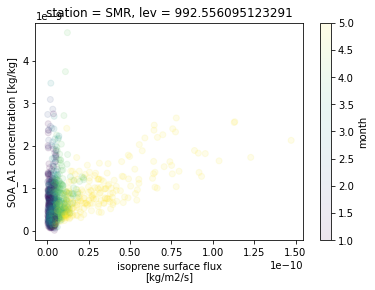

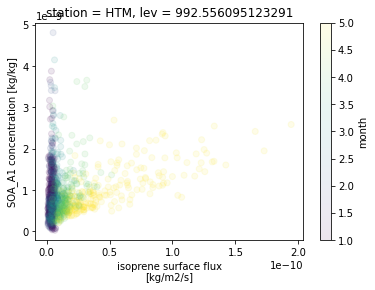

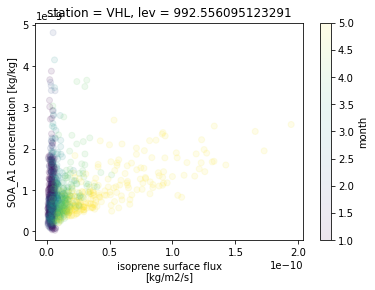

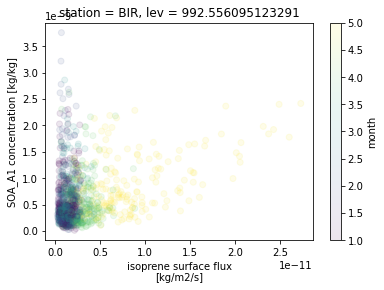

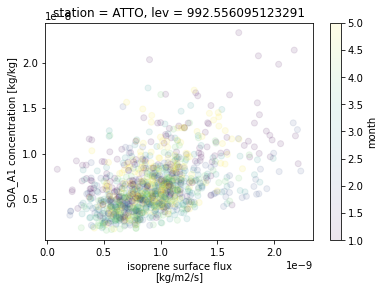

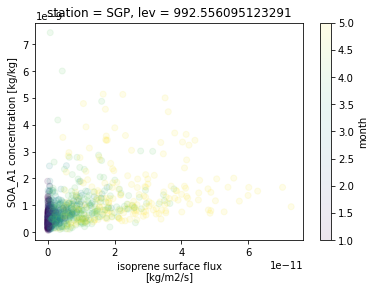

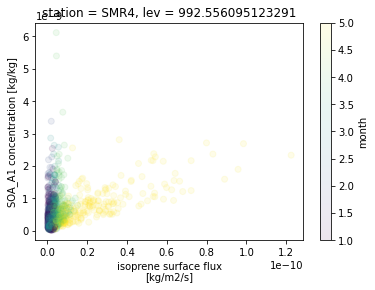

In [75]:
for i in range(7):
    ds_rs3.isel(station=i).isel(lev=-1).plot.scatter(x='SFbvoc', y='OATest', 
                                                     hue='month',
                                             marker ='o',alpha=.1,      
                                            )
    #plt.yscale('log')
    #plt.xscale('log')
    plt.show()

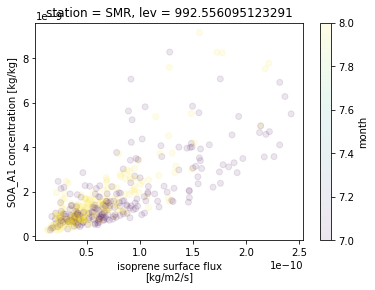

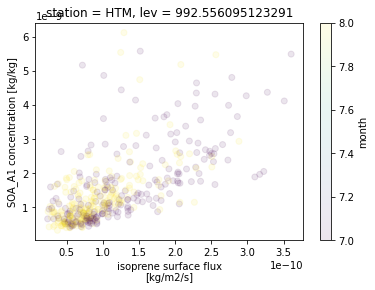

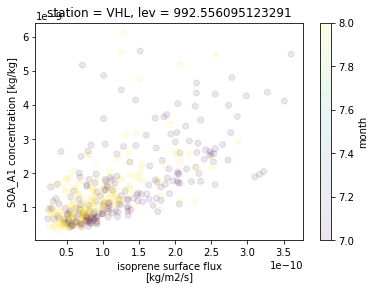

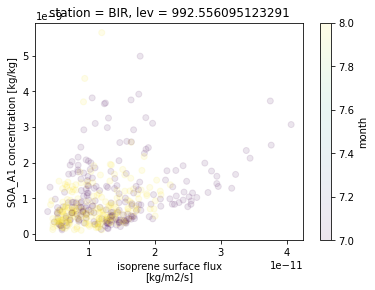

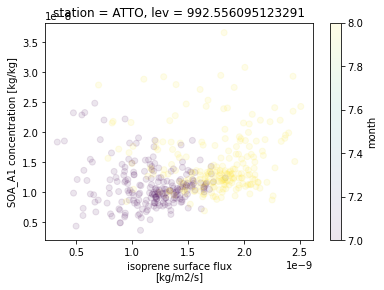

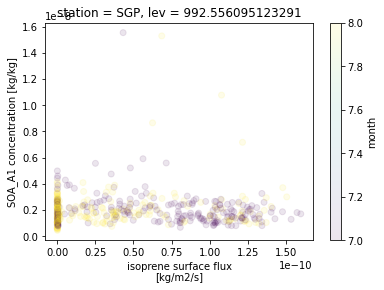

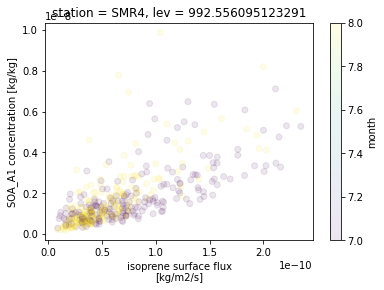

In [76]:
for i in range(7):
    ds_rs2.isel(station=i).isel(lev=-1).plot.scatter(x='SFbvoc', y='OATest', hue = 'month',
                                             marker ='o',alpha=.1,      
                                            )
    #plt.yscale('log')
    #plt.xscale('log')
    plt.show()

### Temp

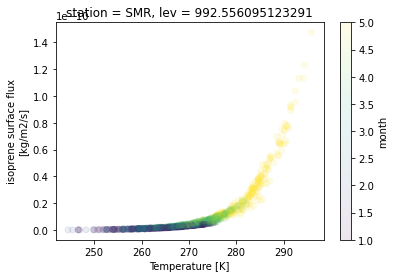

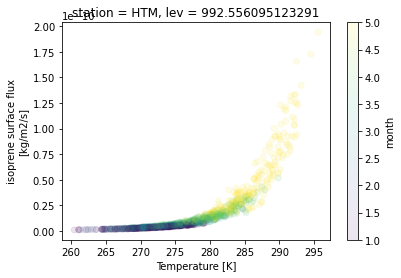

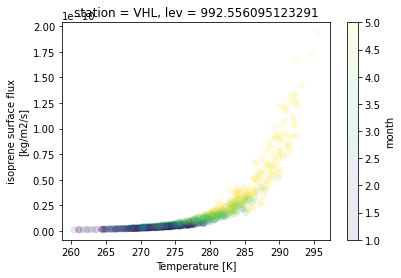

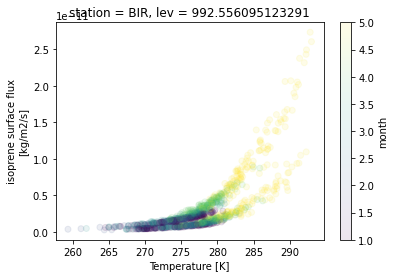

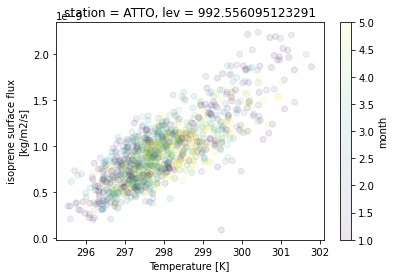

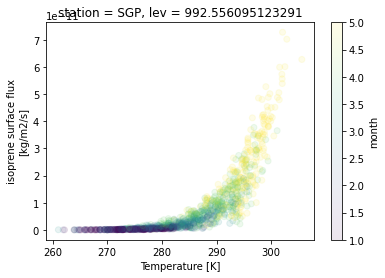

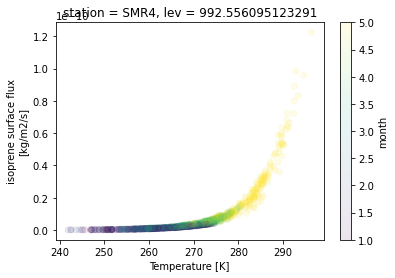

In [77]:
for i in range(7):
    ds_rs3.isel(station=i).isel(lev=-1).plot.scatter(y='SFbvoc', x='T', hue='month',
                                             marker ='o',alpha=.1,      
                                            )
    #plt.yscale('log')
    #plt.xscale('log')
    plt.show()

In [78]:
ds_rs2['month'] = ds_rs2['time.month']

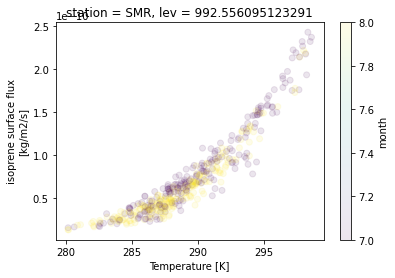

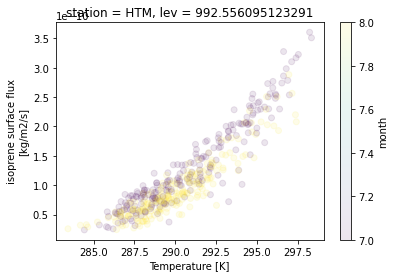

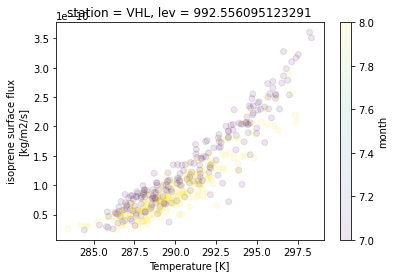

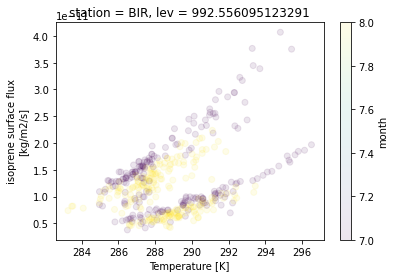

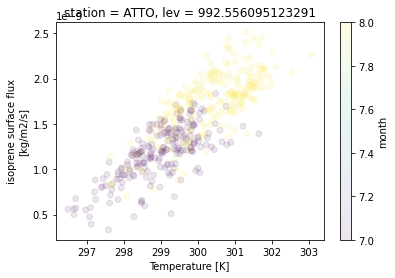

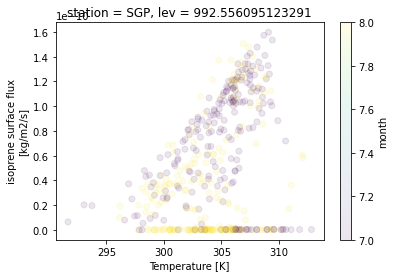

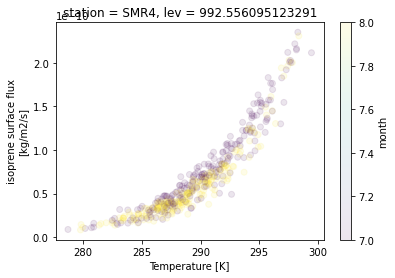

In [79]:
for i in range(7):
    ds_rs2.isel(station=i).isel(lev=-1).plot.scatter(y='SFbvoc', x='T', 
                                                     hue = 'month',
                                             marker ='o',alpha=.1,      
                                            )
    #plt.yscale('log')
    #plt.xscale('log')
    plt.show()


## ECHAM SALSA 

In [80]:
ds_e = dic_mod_ca['ECHAM-SALSA'][case_name_echam]

In [81]:
ds_e['SFbvoc'] = ds_e['emi_isop_bio']+ds_e['emi_monot_bio']

In [82]:
ds_e['T'] = ds_e['tempair']

In [83]:
ds_e['OATest'] = ds_e['ORG_mass']#+ ds['SOA_NA']+ ds['OM_AC'] + ds['OM_AI'] + ds['OM_NI']

In [84]:
ds_e['is_summer'] = ds_e['time.month'].isin([7,8])

In [85]:
ds_e_rs = ds_e.resample(time='1D').mean()

In [86]:
ds_e_rs['month'] = ds_e_rs['time.month']

In [87]:
ds_e_rs['T'] = ds_e_rs['tempair']

In [88]:
ds_e_rs['is_summer'] = ds_e_rs['time.month'].isin([7,8])

In [89]:
ds_e_rs['is_WET'] = ds_e_rs['time.month'].isin([1,2,3,4,5])

In [90]:
ds_e_rs2 = ds_e_rs.where(ds_e_rs['is_summer'], drop=True)

In [91]:
ds_e_rs3 = ds_e_rs.where(ds_e_rs['is_WET'], drop=True)

In [92]:
ds_e_rs3['month'] = ds_e_rs3['time.month']
ds_e_rs2['month'] = ds_e_rs2['time.month']

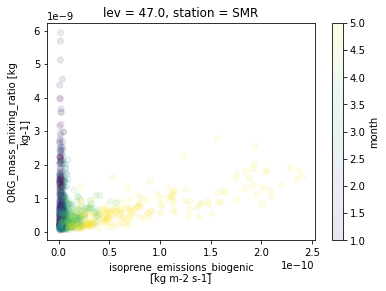

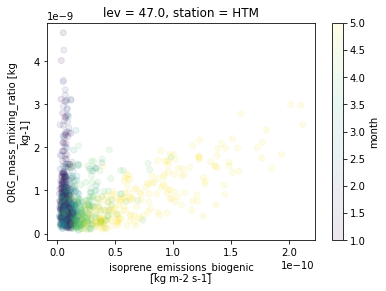

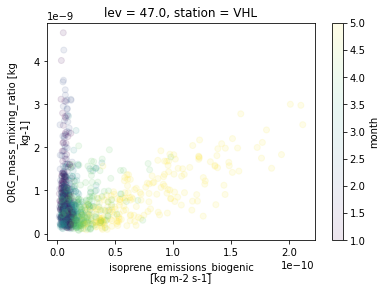

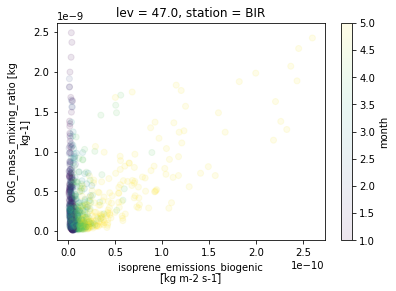

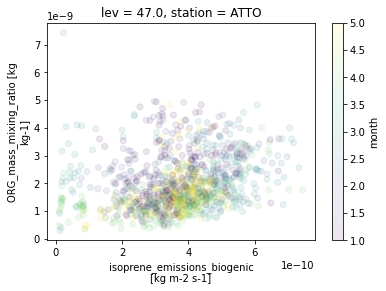

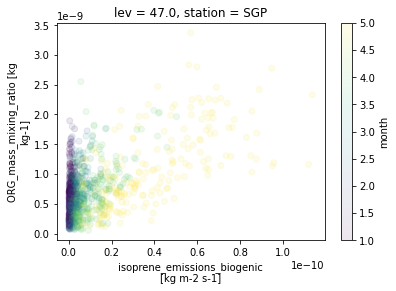

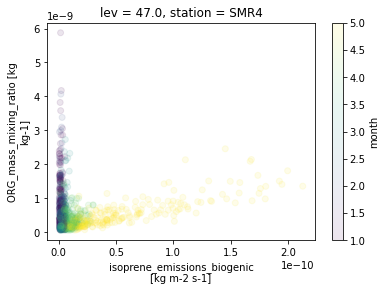

In [93]:
for i in range(7):
    ds_e_rs3.isel(station=i).isel(lev=-1).plot.scatter(x='SFbvoc', y='OATest', 
         hue='month',
                                                       marker ='o',alpha=.1,      
                                            )
    #plt.yscale('log')
    #plt.xscale('log')
    plt.show()

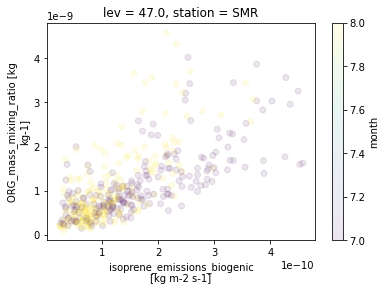

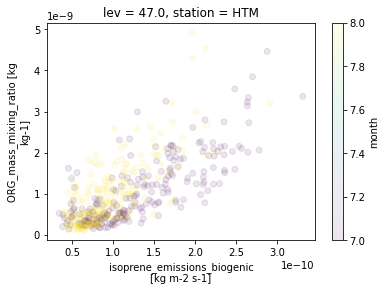

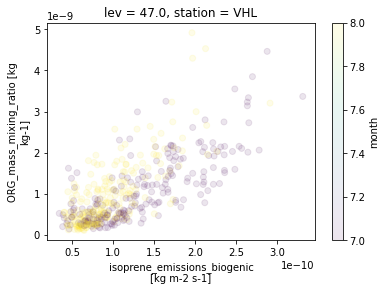

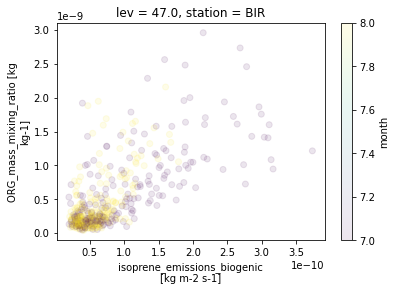

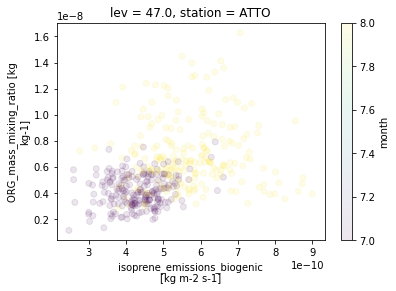

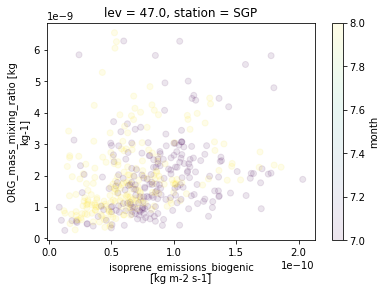

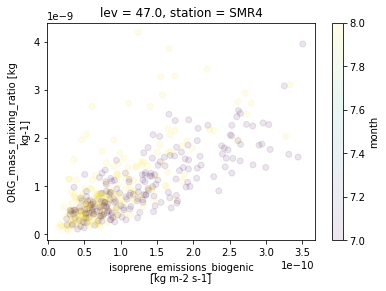

In [94]:
for i in range(7):
    ds_e_rs2.isel(station=i).isel(lev=-1).plot.scatter(x='SFbvoc', y='OATest', 
                                                       hue='month',
                                             marker ='o',alpha=.1,      
                                            )
    #plt.yscale('log')
    #plt.xscale('log')
    plt.show()

In [95]:
ds_e_rs3['T_C'] = ds_e_rs3['T']-273.15

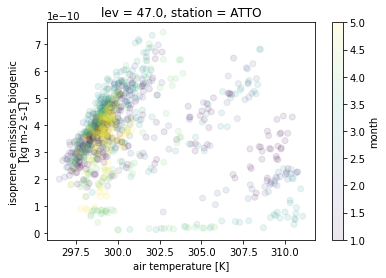

In [96]:
ds_e_rs3.where(ds_e_rs3['T_C']<302).isel(station=4).isel(lev=-1).plot.scatter(y='SFbvoc', x='T', 
                                             marker ='o',alpha=.1,      
                                                       hue='month',          
                                            )

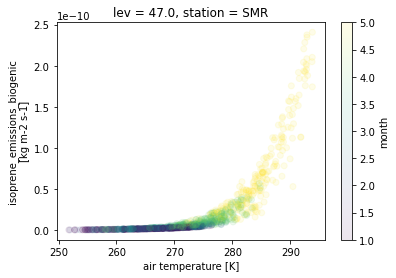

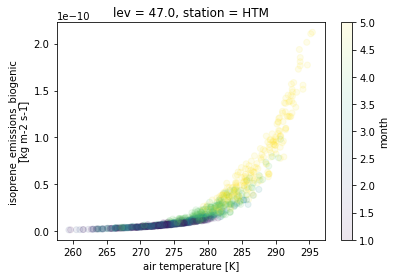

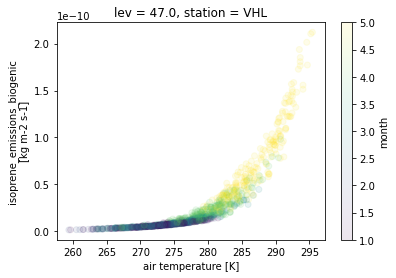

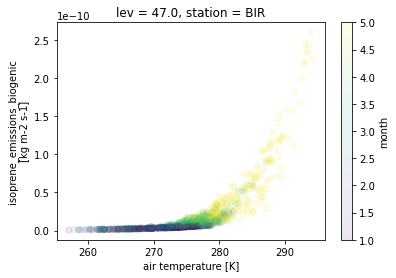

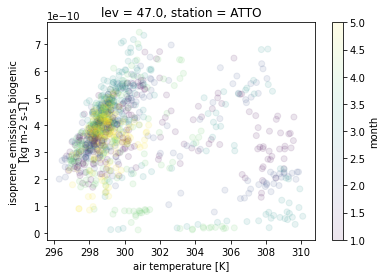

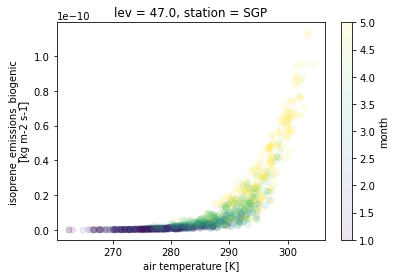

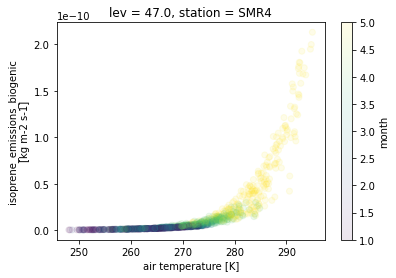

In [168]:
for i in range(7):
    ds_e_rs3.isel(station=i).isel(lev=-1).plot.scatter(y='SFbvoc', x='T', 
                                             marker ='o',alpha=.1,      
                                                       hue='month',
                                                       
                                            )
    #plt.yscale('log')
    #plt.xscale('log')
    plt.show()

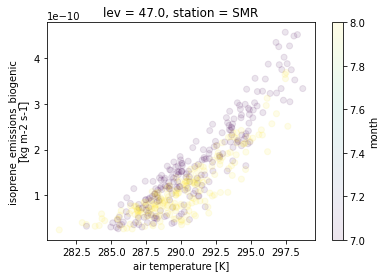

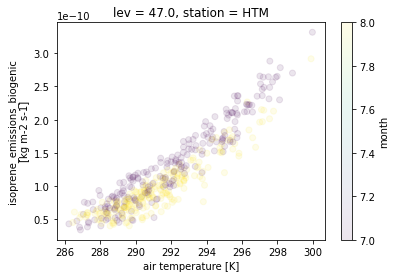

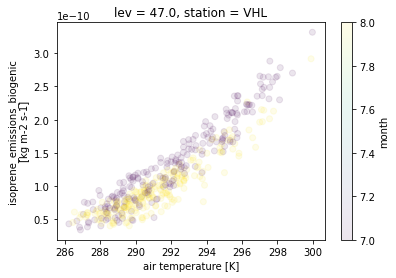

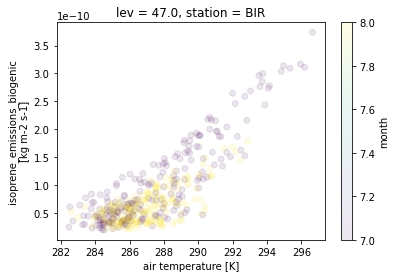

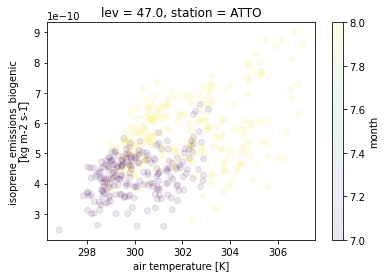

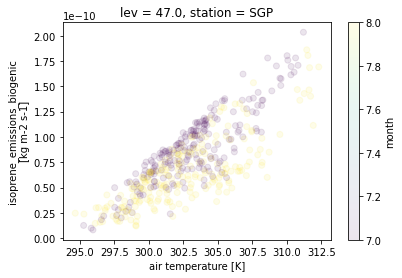

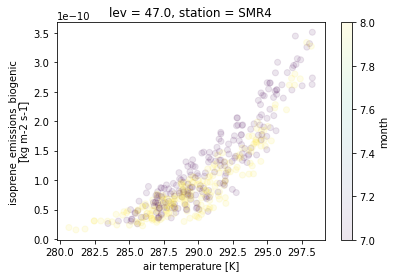

In [169]:
for i in range(7):
    ds_e_rs2.isel(station=i).isel(lev=-1).plot.scatter(y='SFbvoc', x='T', 
                                             marker ='o',alpha=.1,      
                                                       hue='month',
                                            )
    #plt.yscale('log')
    #plt.xscale('log')
    plt.show()